# pytorch搭建神经网络模型

### 神经网络基础
* 神经元：神经网络的基本单元，受生物神经细胞启发，包含线性模型和激活函数两部分。
* 激活函数：引入非线性因素，使神经网络能够处理复杂问题。常见的激活函数有Sigmoid、Tanh和ReLU。
* 神经网络结构：由输入层、隐藏层和输出层组成，神经元首尾相接形成网络结构。

### 神经网络工作过程
* 前向传播：数据从输入层传递到输出层，逐层计算输出结果。
* 损失函数：衡量模型预测值与真实值之间的差距，通常通过平方误差或绝对误差计算。
* 反向传播：利用损失函数从输出层向输入层反向传播误差，通过链式法则计算梯度，更新网络参数。

### PyTorch框架
* 数据预处理：使用`torch.utils.data.DataLoader`和`torch.utils.data.Dataset`处理数据，支持批量处理、打乱顺序等功能。
* 模型构建：通过继承`nn.Module`定义神经网络，使用`forward`方法指定数据流。
* 模型层：包括`nn.Flatten`、`nn.Linear`、`nn.ReLU`等，用于构建网络结构。
* 损失函数和优化器：选择合适的损失函数（如`nn.CrossEntropyLoss`）和优化器（如`torch.optim.SGD`）。
* 训练过程：通过多次迭代（epochs）训练模型，使用`torch.no_grad()`停止梯度跟踪，提高推理效率。* 

### 实验和观察
* 超参数调整：学习率、隐藏层数量、神经元数量等超参数对模型性能有重要影响。
* 训练和测试：通过训练数据集训练模型，并使用测试数据集评估模型性能，观察准确率和损失值的变化。

In [81]:
import torch
from torchvision.transforms.v2 import ToTensor
from torchvision.datasets import FashionMNIST
from torchvision.datasets import KMNIST

(<PIL.Image.Image image mode=L size=28x28 at 0x157BE2DD0>, 0)


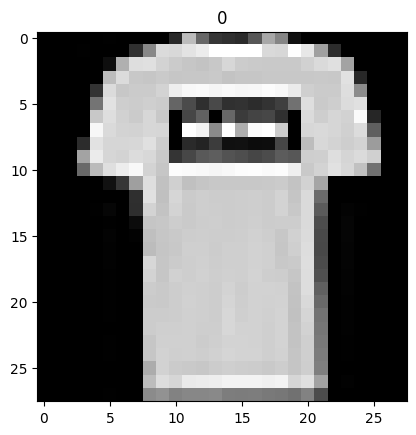

In [82]:
import matplotlib.pyplot as plt
train_data = FashionMNIST(root="./fashion_data",train=True,download=True)
print(train_data[1])
img,clzz = train_data[1]
plt.imshow(img,cmap='gray')
plt.title(clzz)
plt.show()

## FashionMNIST数据集训练

In [83]:
import torch
import torch.nn as nn
from torchvision.transforms.v2 import ToTensor
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader # 数据加载器

# import os
# os.environ["HTTP_PROXY"] = "http://127.0.0.1:1087"
# os.environ["HTTPS_PROXY"] = "http://127.0.0.1:1087"

train_data = FashionMNIST(root="./fashion_data",train=True,download=True,transform=ToTensor())
test_data = FashionMNIST(root="./fashion_data",train=False,download=True,transform=ToTensor())

# print(train_data[1])
# print(train_data[1][0])
# print(train_data[1][0].shape)
# print(train_data[1][0].reshape(-1).shape)

# # 线性层
# liner = nn.Linear(in_features=784,out_features=64,bias=True)
# # 激活函数
# act = nn.Sigmoid()

# liner2 = nn.Linear(in_features=64,out_features=10,bias=True)

# # 模拟输入
# x = torch.randn(10,784)
# out_1 = liner(x)
# # print(out_1)
# out_2 = act(out_1)
# # print(out_2)
# out_3 = liner2(out_2)

# softmax = nn.Softmax(dim=1)
# final = softmax(out_3)
# print(final)

LR = 0.01
epochs=20
batch_size_ = 64

data_loader = DataLoader(train_data,batch_size=batch_size_,shuffle=True) # shuffle 打乱数据

# 所有结构串联
model = nn.Sequential(nn.Linear(784,64),nn.Sigmoid(),nn.Linear(64,10))

# 计算损失函数
loss_func = nn.CrossEntropyLoss() # 交叉熵损失函数
# 优化器（模型参数更新）
optimizer = torch.optim.SGD(model.parameters(),lr=LR)

for epoch in range(epochs):
    # 提取训练数据
    for data,target in data_loader:
        # 前向运算
        output = model(data.reshape(-1,784))
        # 计算损失
        loss = loss_func(output,target)
        # 反向传播
        optimizer.zero_grad()
        loss.backward() # 计算梯度 grad
        optimizer.step() # 更新参数

        print(f"Loss:{loss.item()}")


data_loader = DataLoader(test_data,batch_size=batch_size_)

correct = 0
total = 0

with torch.no_grad():
    for data,target in data_loader:
        output = model(data.reshape(-1,784))
        _,predicted = torch.max(output,1)
        total += target.size(0)
        correct += (predicted==target).sum().item()
print(f"test result{correct/total*100}%")


Loss:2.3563976287841797
Loss:2.3032474517822266
Loss:2.365753412246704
Loss:2.312826633453369
Loss:2.3879919052124023
Loss:2.3183481693267822
Loss:2.4044833183288574
Loss:2.326819658279419
Loss:2.319707155227661
Loss:2.3331451416015625
Loss:2.3468306064605713
Loss:2.3400869369506836
Loss:2.2812492847442627
Loss:2.2903764247894287
Loss:2.3100802898406982
Loss:2.29025936126709
Loss:2.2917497158050537
Loss:2.3221185207366943
Loss:2.354447841644287
Loss:2.3022258281707764
Loss:2.2847793102264404
Loss:2.3407323360443115
Loss:2.3152854442596436
Loss:2.321563243865967
Loss:2.3033223152160645
Loss:2.2799408435821533
Loss:2.324414014816284
Loss:2.2881901264190674
Loss:2.300128698348999
Loss:2.3141329288482666
Loss:2.315192461013794
Loss:2.2802934646606445
Loss:2.299175977706909
Loss:2.3135297298431396
Loss:2.3000648021698
Loss:2.292860507965088
Loss:2.283186197280884
Loss:2.2909226417541504
Loss:2.2933123111724854
Loss:2.307060480117798
Loss:2.2980284690856934
Loss:2.2889373302459717
Loss:2.276

## KMNIST数据集训练

In [85]:
import torch
import torch.nn as nn
from torchvision.transforms.v2 import ToTensor
from torchvision.datasets import KMNIST
from torch.utils.data import DataLoader

# 数据集配置（自动下载）
train_data = KMNIST(root="./kmnist_data", 
                   train=True,
                   download=True,
                   transform=ToTensor())
test_data = KMNIST(root="./kmnist_data",
                  train=False,
                  download=True,
                  transform=ToTensor())

# 超参数组合实验
hyper_params = [
    {'lr': 0.1, 'batch_size': 32, 'epochs': 15},
    {'lr': 0.01, 'batch_size': 64, 'epochs': 20},
    {'lr': 0.001, 'batch_size': 128, 'epochs': 25}
]

# 设备检测
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for params in hyper_params:
    print(f"\ntraining: lr={params['lr']}, batch={params['batch_size']}, epochs={params['epochs']}")
    
    # 模型定义
    model = nn.Sequential(
        nn.Flatten(),  # 自动展平输入数据，无需手动reshape
        nn.Linear(784, 256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),  # 添加批归一化
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    ).to(device)
    
    # 训练配置
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=params['lr'])  # 使用Adam优化器
    train_loader = DataLoader(train_data, 
                             batch_size=params['batch_size'],
                             shuffle=True)
    
    # 训练循环
    for epoch in range(params['epochs']):
        model.train()
        total_loss = 0
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            
            # 前向传播
            output = model(data)  # 不需要手动reshape
            loss = loss_func(output, target)
            
            # 反向传播
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{params['epochs']}, Loss: {avg_loss:.4f}")

    # 测试评估
    model.eval()
    test_loader = DataLoader(test_data, 
                            batch_size=params['batch_size'],
                            shuffle=False)
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    accuracy = 100 * correct / total
    print(f"test result: {accuracy:.2f}%\n")



training: lr=0.1, batch=32, epochs=15
Epoch 1/15, Loss: 0.8563
Epoch 2/15, Loss: 0.5792
Epoch 3/15, Loss: 0.5131
Epoch 4/15, Loss: 0.4797
Epoch 5/15, Loss: 0.4609
Epoch 6/15, Loss: 0.4081
Epoch 7/15, Loss: 0.3720
Epoch 8/15, Loss: 0.3911
Epoch 9/15, Loss: 0.3446
Epoch 10/15, Loss: 0.3316
Epoch 11/15, Loss: 0.3411
Epoch 12/15, Loss: 0.3145
Epoch 13/15, Loss: 0.3270
Epoch 14/15, Loss: 0.3206
Epoch 15/15, Loss: 0.2955
test result: 83.27%


training: lr=0.01, batch=64, epochs=20
Epoch 1/20, Loss: 0.3724
Epoch 2/20, Loss: 0.1901
Epoch 3/20, Loss: 0.1454
Epoch 4/20, Loss: 0.1125
Epoch 5/20, Loss: 0.1009
Epoch 6/20, Loss: 0.0858
Epoch 7/20, Loss: 0.0745
Epoch 8/20, Loss: 0.0678
Epoch 9/20, Loss: 0.0629
Epoch 10/20, Loss: 0.0548
Epoch 11/20, Loss: 0.0519
Epoch 12/20, Loss: 0.0485
Epoch 13/20, Loss: 0.0451
Epoch 14/20, Loss: 0.0439
Epoch 15/20, Loss: 0.0410
Epoch 16/20, Loss: 0.0362
Epoch 17/20, Loss: 0.0351
Epoch 18/20, Loss: 0.0323
Epoch 19/20, Loss: 0.0311
Epoch 20/20, Loss: 0.0361
test res